# Zach McLean
## Open Lab 1
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ----------------------------
# Process the WDBC Data Set
# ----------------------------
wdbc_url = "https://jupyterhub.cs.mtsu.edu/azuread/services/csci4850-materials/public/WDBC.txt"

# Use whitespace delimiter (often the file is space-separated rather than tab-separated)
wdbc = pd.read_csv(wdbc_url, delim_whitespace=True, header=None)
print("WDBC shape:", wdbc.shape)
print("WDBC first 5 rows:")
print(wdbc.head())

WDBC shape: (568, 31)
WDBC first 5 rows:
         0         1         2         3         4         5         6   \
0  0.676628  0.626018  0.647215  0.430228  0.552570  0.349160  0.343955   
1  0.518677  0.548116  0.516764  0.257817  0.645043  0.540822  0.333880   
2  0.519032  0.577393  0.511353  0.262735  0.518544  0.385061  0.241096   
3  0.408751  0.371436  0.392520  0.161895  0.640147  0.238217  0.124367   
4  0.372821  0.505601  0.353952  0.135026  0.654835  0.172872  0.113191   

         7         8         9   ...        21        22        23        24  \
0  0.411083  0.642434  0.577689  ...  0.613847  0.608678  0.381523  0.561096   
1  0.436531  0.740789  0.710591  ...  0.670367  0.487261  0.210837  0.685085   
2  0.185686  0.478289  0.630850  ...  0.550464  0.421576  0.172426  0.460916   
3  0.097863  0.585197  0.674672  ...  0.442067  0.326592  0.109920  0.607367   
4  0.152585  0.571382  0.660919  ...  0.594671  0.293312  0.094687  0.680593   

         25        26      

/tmp/ipykernel_3846/3526779083.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  wdbc = pd.read_csv(wdbc_url, delim_whitespace=True, header=None)


In [2]:
# --- Select features and labels ---
# Here we assume that the first column is an ID and the last column is the label.
X_wdbc = wdbc.iloc[:, 1:-1].values  # features (columns 1 to second-last)
y_wdbc = wdbc.iloc[:, -1].values     # label (last column)

# Inspect the unique label values before conversion
print("Unique WDBC labels (raw):", np.unique(y_wdbc))

# Convert labels to int.
# If a direct conversion fails because extra spaces or multiple numbers are present,
# we split the string and take the last token.
try:
    y_wdbc = y_wdbc.astype(int)
except ValueError:
    y_wdbc = np.array([int(str(label).strip().split()[-1]) for label in y_wdbc])
print("Converted WDBC labels:", np.unique(y_wdbc))

Unique WDBC labels (raw): [0 1]
Converted WDBC labels: [0 1]


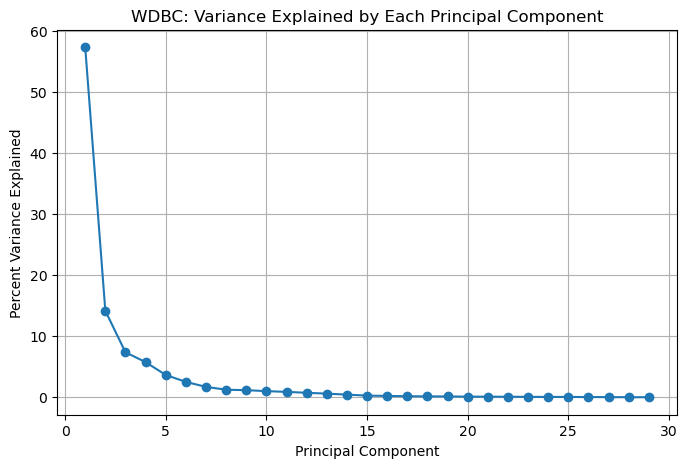

In [3]:
# ----------------------------
# PCA Analysis for WDBC Data
# ----------------------------

# Compute PCA on all components to get the variance explained
pca_wdbc_full = PCA(n_components=X_wdbc.shape[1])
pca_wdbc_full.fit(X_wdbc)
explained_var_wdbc = pca_wdbc_full.explained_variance_ratio_ * 100  # convert to percentage

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var_wdbc)+1), explained_var_wdbc, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percent Variance Explained")
plt.title("WDBC: Variance Explained by Each Principal Component")
plt.grid(True)
plt.show()

In [4]:
# Percent variance of the first two principal components
percent_first_two_wdbc = explained_var_wdbc[0] + explained_var_wdbc[1]
print("WDBC: Percent variance for first two PCs: {:.2f}%".format(percent_first_two_wdbc))

WDBC: Percent variance for first two PCs: 71.57%


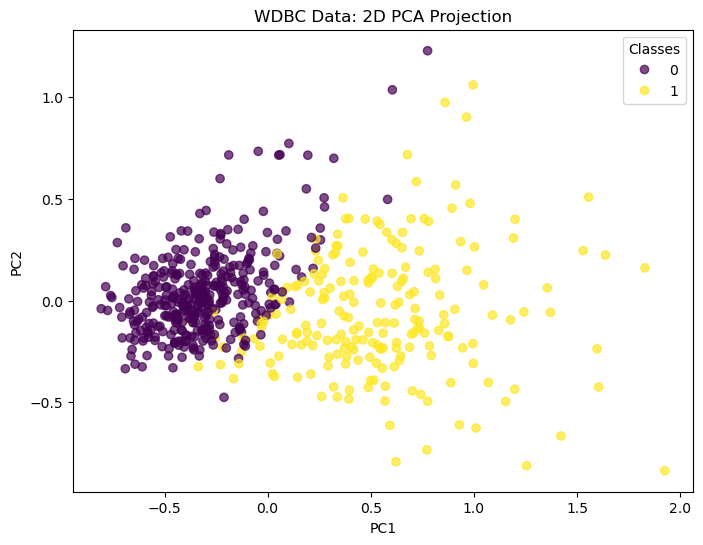

In [5]:
# 2D PCA Projection
pca_wdbc_2d = PCA(n_components=2)
X_wdbc_pca2d = pca_wdbc_2d.fit_transform(X_wdbc)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_wdbc_pca2d[:, 0], X_wdbc_pca2d[:, 1], c=y_wdbc, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("WDBC Data: 2D PCA Projection")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

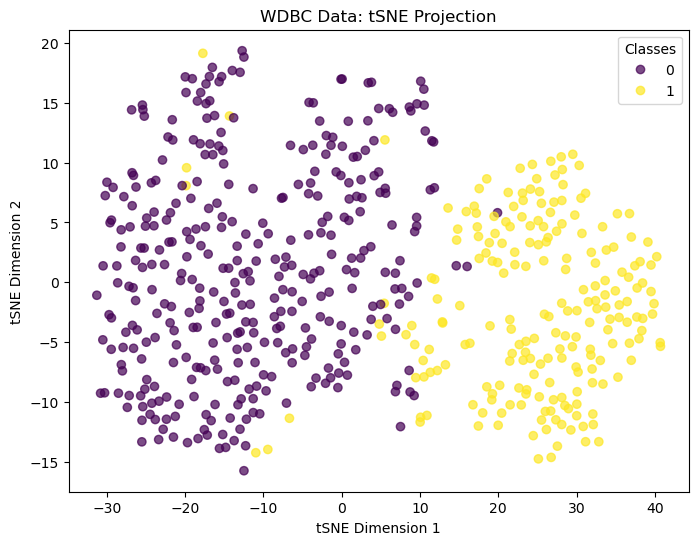

In [6]:
# tSNE Projection for WDBC Data
tsne_wdbc = TSNE(n_components=2, random_state=42)
X_wdbc_tsne = tsne_wdbc.fit_transform(X_wdbc)

plt.figure(figsize=(8,6))
scatter_tsne = plt.scatter(X_wdbc_tsne[:, 0], X_wdbc_tsne[:, 1], c=y_wdbc, cmap='viridis', alpha=0.7)
plt.xlabel("tSNE Dimension 1")
plt.ylabel("tSNE Dimension 2")
plt.title("WDBC Data: tSNE Projection")
plt.legend(*scatter_tsne.legend_elements(), title="Classes")
plt.show()

In [7]:
# ----------------------------
# Process the Cancer Data Set
# ----------------------------
cancer_url = "https://jupyterhub.cs.mtsu.edu/azuread/services/csci4850-materials/public/cancer-data.txt"

# use delim_whitespace=True to split on any whitespace.
cancer = pd.read_csv(cancer_url, delim_whitespace=True, header=None)
print("Cancer data shape:", cancer.shape)
print("Cancer first 5 rows:")
print(cancer.head())

Cancer data shape: (105, 10)
Cancer first 5 rows:
          0         1         2         3         4         5         6  \
0  0.403031 -0.201869 -0.514364  0.281025  0.031448  0.038313  0.077419   
1 -0.143195 -0.229700 -0.247123 -0.159317 -0.039304 -0.056306 -0.118002   
2 -0.320793 -0.009980 -0.013535 -0.196065 -0.043803 -0.140186 -0.154165   
3  0.296405 -0.116178 -0.072922  0.011953  0.008283  0.140980  0.186672   
4  0.527400 -0.171481 -0.129322  0.070643  0.034188  0.200178  0.233787   

          7         8  9  
0  0.326175  0.316867  5  
1 -0.156398 -0.130796  3  
2 -0.200068 -0.314185  3  
3 -0.030703  0.340534  4  
4  0.035358  0.529138  5  


/tmp/ipykernel_3846/1995761550.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cancer = pd.read_csv(cancer_url, delim_whitespace=True, header=None)


In [8]:
# --- Select features and labels ---
# Here we assume that the first column is an ID and the last column is the label.
X_cancer = cancer.iloc[:, 1:-1].values  # features (all columns except first and last)
y_cancer = cancer.iloc[:, -1].values     # label (last column)

# Check the unique values before conversion
print("Unique Cancer labels (raw):", np.unique(y_cancer))

# Convert labels to int. Use try/except in case there are extra spaces or multiple tokens.
try:
    y_cancer = y_cancer.astype(int)
except ValueError:
    y_cancer = np.array([int(str(label).strip().split()[-1]) for label in y_cancer])
print("Converted Cancer labels:", np.unique(y_cancer))

Unique Cancer labels (raw): [0 1 2 3 4 5]
Converted Cancer labels: [0 1 2 3 4 5]


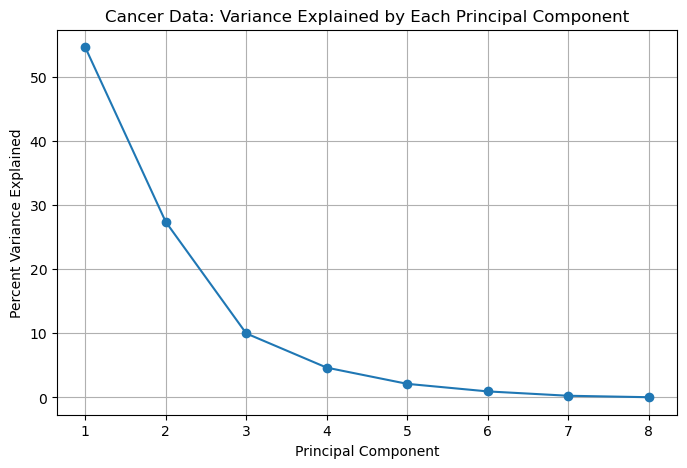

In [9]:
# ----------------------------
# PCA Analysis for Cancer Data
# ----------------------------
pca_cancer_full = PCA(n_components=X_cancer.shape[1])
pca_cancer_full.fit(X_cancer)
explained_var_cancer = pca_cancer_full.explained_variance_ratio_ * 100

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var_cancer)+1), explained_var_cancer, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percent Variance Explained")
plt.title("Cancer Data: Variance Explained by Each Principal Component")
plt.grid(True)
plt.show()

In [10]:
# Percent variance of the first two principal components for cancer data
percent_first_two_cancer = explained_var_cancer[0] + explained_var_cancer[1]
print("Cancer Data: Percent variance for first two PCs: {:.2f}%".format(percent_first_two_cancer))

Cancer Data: Percent variance for first two PCs: 82.03%


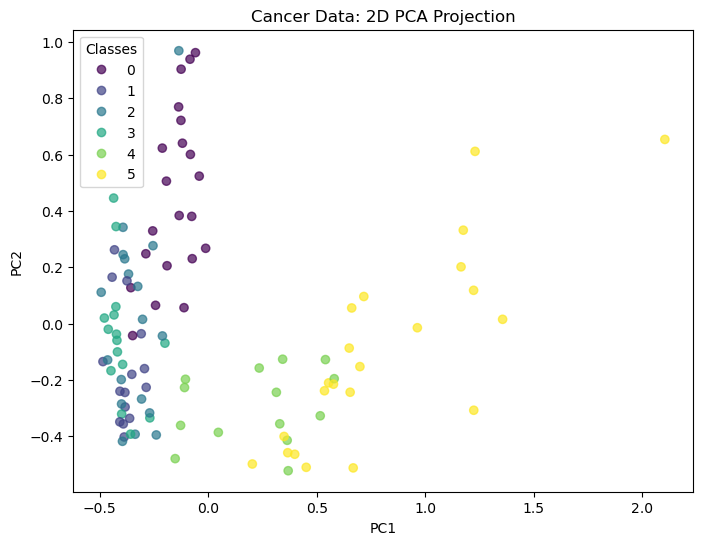

In [11]:
# 2D PCA Projection for Cancer Data
pca_cancer_2d = PCA(n_components=2)
X_cancer_pca2d = pca_cancer_2d.fit_transform(X_cancer)

plt.figure(figsize=(8,6))
scatter_cancer = plt.scatter(X_cancer_pca2d[:, 0], X_cancer_pca2d[:, 1], c=y_cancer, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cancer Data: 2D PCA Projection")
plt.legend(*scatter_cancer.legend_elements(), title="Classes")
plt.show()

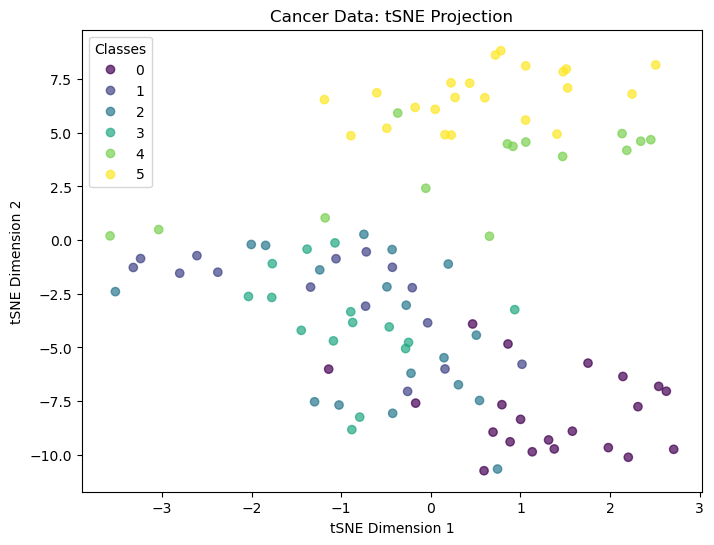

In [12]:
# tSNE Projection for Cancer Data
tsne_cancer = TSNE(n_components=2, random_state=42)
X_cancer_tsne = tsne_cancer.fit_transform(X_cancer)

plt.figure(figsize=(8,6))
scatter_tsne_cancer = plt.scatter(X_cancer_tsne[:, 0], X_cancer_tsne[:, 1], c=y_cancer, cmap='viridis', alpha=0.7)
plt.xlabel("tSNE Dimension 1")
plt.ylabel("tSNE Dimension 2")
plt.title("Cancer Data: tSNE Projection")
plt.legend(*scatter_tsne_cancer.legend_elements(), title="Classes")
plt.show()